In [101]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from textblob import TextBlob
import plotly.graph_objects as go
import plotly.express as px

In [103]:
trump_reviews = pd.read_csv("Trumpall2.csv")
biden_reviews = pd.read_csv("Bidenall2.csv")

In [105]:
trump_reviews.head(3)

,user,text
0,manny_rosen,@sanofi please tell us how many shares the Cr...
1,osi_abdul,"https://t.co/atM98CpqF7 Like, comment, RT #P..."
2,Patsyrw,Your AG Barr is as useless &amp; corrupt as y...


In [107]:
biden_reviews.head(3)

,user,text
0,MarkHodder3,@JoeBiden And we’ll find out who won in 2026...
1,K87327961G,@JoeBiden Your Democratic Nazi Party cannot be...
2,OldlaceA,@JoeBiden So did Lying Barr


In [109]:
textblob1 = TextBlob(trump_reviews['text'][10])
textblob1.sentiment
textblob2 = TextBlob(biden_reviews['text'][500])
textblob2.sentiment

Sentiment(polarity=0.6, subjectivity=0.9)

In [111]:
def find_pol(review):
    return TextBlob(review).sentiment.polarity

In [113]:
trump_reviews["Sentiment Polarity"] = trump_reviews["text"].apply(find_pol)
biden_reviews["Sentiment Polarity"] = biden_reviews["text"].apply(find_pol)

In [114]:
trump_reviews.head(3)

,user,text,Sentiment Polarity
0,manny_rosen,@sanofi please tell us how many shares the Cr...,0.05
1,osi_abdul,"https://t.co/atM98CpqF7 Like, comment, RT #P...",0.00
2,Patsyrw,Your AG Barr is as useless &amp; corrupt as y...,-0.50


In [115]:
biden_reviews.head(3)

,user,text,Sentiment Polarity
0,MarkHodder3,@JoeBiden And we’ll find out who won in 2026...,0.0
1,K87327961G,@JoeBiden Your Democratic Nazi Party cannot be...,0.0
2,OldlaceA,@JoeBiden So did Lying Barr,0.0


In [116]:
# 1 polarity > 0 :: positive
# 2 polarity < 0 :: negative
# 3 Polarity == 0 :: neutral

trump_reviews["Expression Label"] = np.where(trump_reviews["Sentiment Polarity"]>0, "positive", "negative")
trump_reviews["Expression Label"][trump_reviews["Sentiment Polarity"]==0]="Neutral"
print(trump_reviews.tail())

biden_reviews["Expression Label"] = np.where(biden_reviews["Sentiment Polarity"]>0, "positive", "negative")
biden_reviews["Expression Label"][biden_reviews["Sentiment Polarity"]==0]="Neutral"
print(biden_reviews.tail())

                 user                                               text  \
2783          4diva63  @realDonaldTrump For the 1/100 time, absentee ...   
2784         hidge826  @realDonaldTrump If you’re so scared of losing...   
2785     SpencerRossy  @realDonaldTrump I rarely get involved with fo...   
2786  ScoobyMcpherson  @realDonaldTrump This is the moment when Trump...   
2787          bjklinz     @realDonaldTrump I’m sorry, Donald. No. #POTUS   

      Sentiment Polarity Expression Label  
2783               0.000          Neutral  
2784               0.000          Neutral  
2785               0.225         positive  
2786               0.000          Neutral  
2787              -0.500         negative  
             user                                               text  \
2535    meryn1977  @JoeBiden You'll just try to calm those waters...   
2536  BSNelson114  @JoeBiden 96 days 96 dias #VoteJoeBiden2020  #...   
2537     KenCapel  @JoeBiden YOU THINK YOU CAN DO THAT??? YOU C

/var/folders/rf/33791c0j7md_ztrv56z43bq00000gn/T/ipykernel_5970/1242479740.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/rf/33791c0j7md_ztrv56z43bq00000gn/T/ipykernel_5970/1242479740.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [117]:
reviews1 = trump_reviews[trump_reviews['Sentiment Polarity'] == 0.0000]
print(reviews1.shape)

cond1=trump_reviews['Sentiment Polarity'].isin(reviews1['Sentiment Polarity'])
trump_reviews.drop(trump_reviews[cond1].index, inplace = True)
print(trump_reviews.shape)

(1464, 4)
(1324, 4)


In [119]:
reviews2 = biden_reviews[biden_reviews['Sentiment Polarity'] == 0.0000]
print(reviews2.shape)

cond2=biden_reviews['Sentiment Polarity'].isin(reviews1['Sentiment Polarity'])
biden_reviews.drop(biden_reviews[cond2].index, inplace = True)
print(biden_reviews.shape)

(1509, 4)
(1031, 4)


In [125]:
# Donald Trump
np.random.seed(10)
remove_n =324
drop_indices = np.random.choice(trump_reviews.index, remove_n, replace=False)
df_subset_trump = trump_reviews.drop(drop_indices)
print(df_subset_trump.shape)
# Joe Biden
np.random.seed(10)
remove_n =31
drop_indices = np.random.choice(biden_reviews.index, remove_n, replace=False)
df_subset_biden = biden_reviews.drop(drop_indices)
print(df_subset_biden.shape)

(1000, 4)
(1000, 4)


In [127]:
count_1 = df_subset_trump.groupby('Expression Label').count()
print(count_1)

negative_per1 = (count_1['Sentiment Polarity'][0]/1000)*10
positive_per1 = (count_1['Sentiment Polarity'][1]/1000)*100

count_2 = df_subset_biden.groupby('Expression Label').count()
print(count_2)

negative_per2 = (count_2['Sentiment Polarity'][0]/1000)*100
positive_per2 = (count_2['Sentiment Polarity'][1]/1000)*100

                  user  text  Sentiment Polarity
Expression Label                                
negative           449   449                 449
positive           551   551                 551
                  user  text  Sentiment Polarity
Expression Label                                
negative           393   393                 393
positive           607   607                 607


/var/folders/rf/33791c0j7md_ztrv56z43bq00000gn/T/ipykernel_5970/545325044.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/var/folders/rf/33791c0j7md_ztrv56z43bq00000gn/T/ipykernel_5970/545325044.py:5: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/var/folders/rf/33791c0j7md_ztrv56z43bq00000gn/T/ipykernel_5970/545325044.py:10: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/var/folders/rf/33791c0j7md_ztrv56z43bq00000gn/T/ipykerne

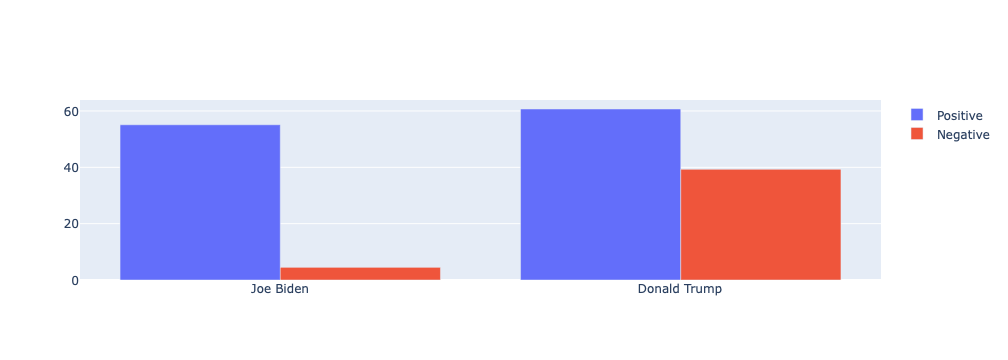

In [129]:
Politicians = ['Joe Biden', 'Donald Trump']
lis_pos = [positive_per1, positive_per2]
lis_neg = [negative_per1, negative_per2]

fig = go.Figure(data=[
    go.Bar(name='Positive', x=Politicians, y=lis_pos),
    go.Bar(name='Negative', x=Politicians, y=lis_neg)
])

fig.update_layout(barmode='group')
fig.show()